In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
from sklearn.datasets import make_classification

In [30]:
x, y = make_classification(n_samples=200, n_features=2, n_informative=2,n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=5)

Text(0.5, 1.0, 'Binary Classification Dataset')

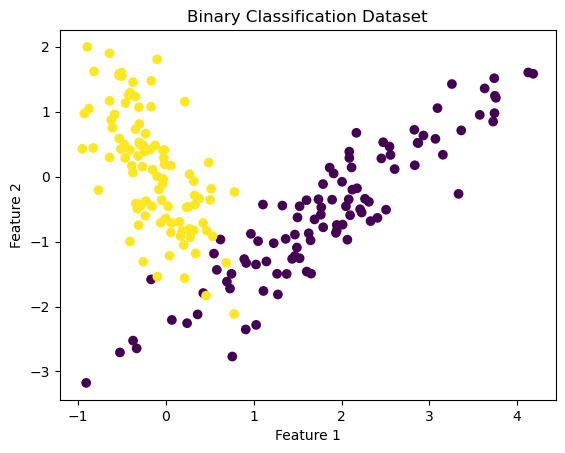

In [31]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")

In [32]:
class logistic_reg:

    def __init__(self, lr = 0.1, epochs = 1000):
        self.lr = lr 
        self.weights = None
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y):
        n_sample, n_feature = x.shape
        x = np.insert(x, 0, 1, axis = 1)
        self.weights = np.ones(n_feature+1)
        
        for i in range(self.epochs):
            z = np.dot(x, self.weights)
            y_hat = self.sigmoid(z)
            grad = np.dot(x.T, (y_hat - y)) / n_sample
            self.weights -= self.lr * grad

    def pred_prob(self, x):
        x = np.insert(x, 0, 1, axis=1)
        z = np.dot(x, self.weights)
        return self.sigmoid(z)

    def predict(self, x):
        prob = self.pred_prob(x)
        return (prob >= 0.5).astype(int)

In [33]:
lor = logistic_reg()

In [34]:
lor.fit(x, y)

In [35]:
y_pred = lor.predict(x)

In [40]:
w0 = lor.weights[0]
w1 = lor.weights[1]
w2 = lor.weights[2]

Text(0.5, 1.0, 'Binary Classification Dataset')

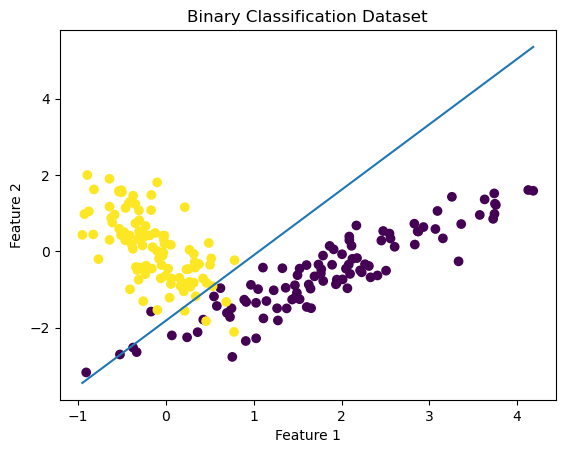

In [41]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y)
x1 = np.linspace(x[:,0].min(), x[:, 0].max(), 100)
x2 = -(w0 + w1*x1) / w2
plt.plot(x1, x2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")